In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'C:\Users\Hang\Desktop\train_ctrUa4K.csv')
test = pd.read_csv(r'C:\Users\Hang\Desktop\test_lAUu6dG.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [16]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Univariate Analysis

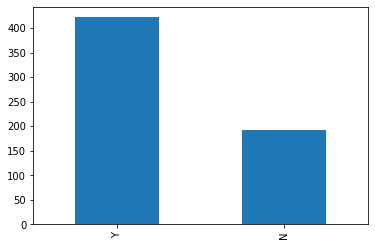

In [17]:
train['Loan_Status'].value_counts().plot.bar()

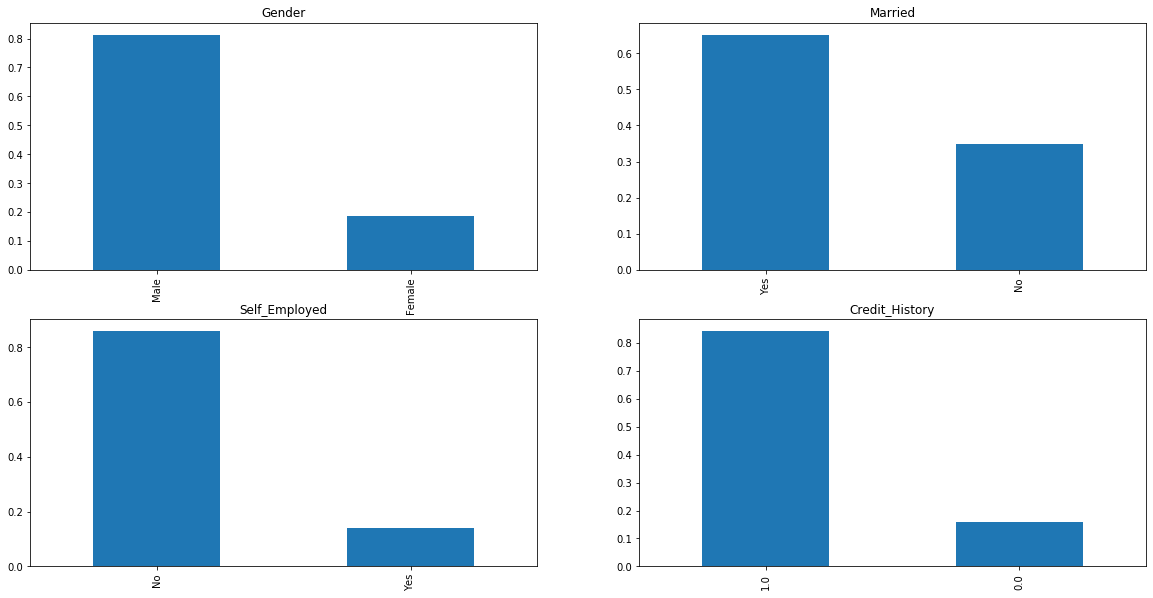

In [24]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar( title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar( title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar( title='Credit_History')

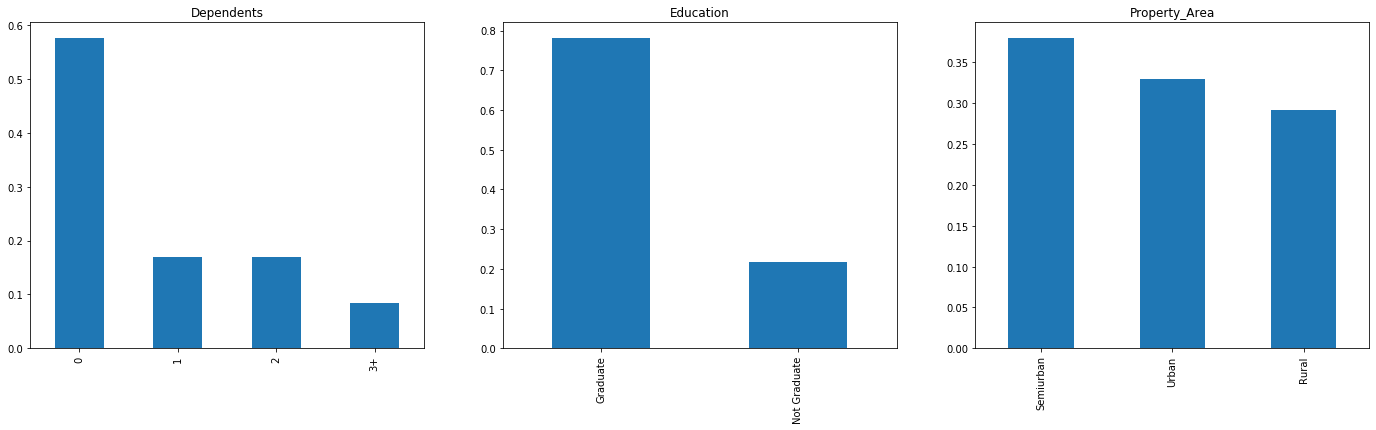

In [27]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Property_Area')

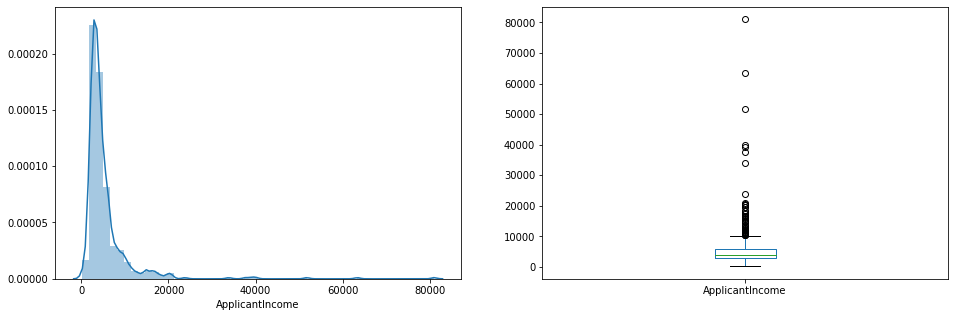

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize= (16,5))

Text(0.5, 0.98, '')

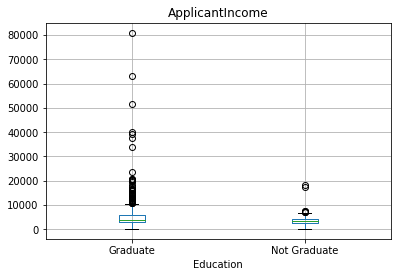

In [33]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')


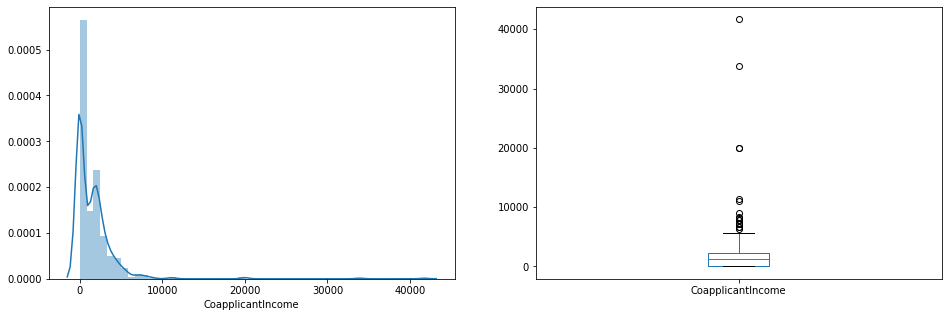

In [35]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

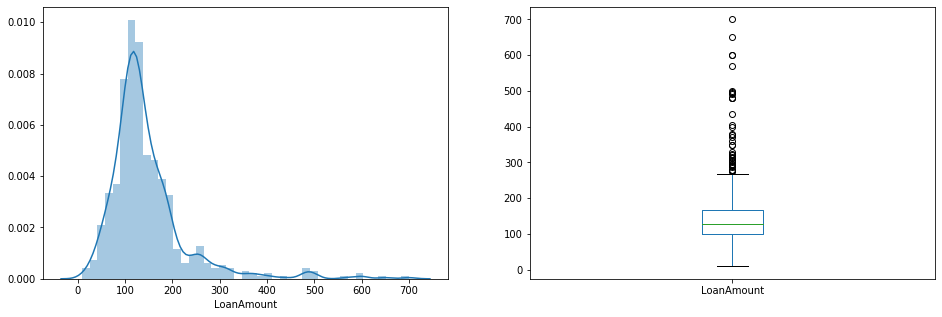

In [36]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

# Bivariate Analysis

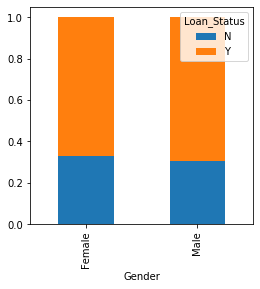

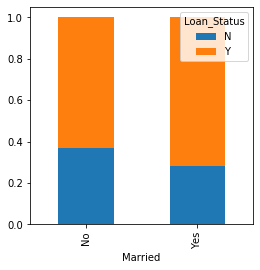

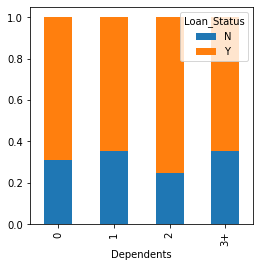

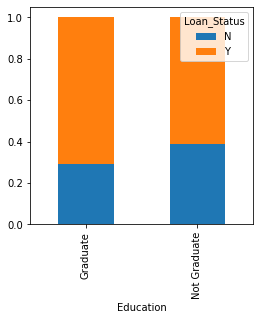

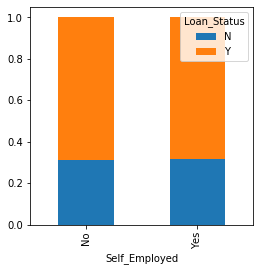

In [49]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

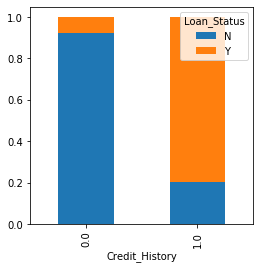

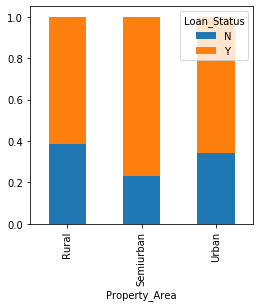

In [51]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis =0).plot(kind='bar', stacked =True, figsize=(4,4))

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis =0).plot(kind='bar', stacked =True, figsize=(4,4))

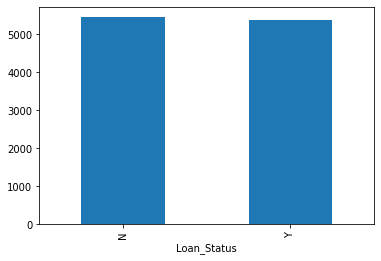

In [55]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [57]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [59]:
train

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status Income_bin  
0               1.0         Urban           Y       High  
1               1.0         Rural           N       High  
2               1.0         Urban           Y    Average  
3               1.0         Urban           Y    Average  
4               1.0         Urban           Y       High  
..              ...           ...         ...        ...  
609             1.0         Rural           Y    Average  
610             1.0         Rural           Y       High  
611             1.0         Urban           Y  Very high  
612             1.0         Urban           Y  Very high  
613             0.0     Semiurban           N       High  

[614 rows x 14 columns]

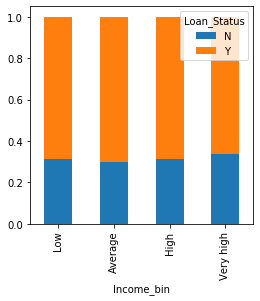

In [62]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis =0).plot(kind='bar', stacked =True, figsize=(4,4))

In [65]:
bins = [0, 1000, 3000, 42000]
groups = ['Low', 'Average', 'High']
train['Coapplicant_income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=groups)

In [66]:
train

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status Income_bin  \
0               1.0         Urban           Y       High   
1               1.0         Rural           N       High   
2               1.0         Urban           Y    Average   
3               1.0         Urban           Y    Average   
4               1.0         Urban           Y       High   
..              ...           ...         ...        ...   
609             1.0         Rural           Y    Average   
610             1.0         Rural           Y       High   
611             1.0         Urban           Y  Very high   
612             1.0         Urban           Y  Very high   
613             0.0     Semiurban           N       High   

    Coapplicant_income_bin  
0                      NaN  
1                  Average  
2                      NaN  
3                  Average  
4                      NaN  
..                     ...  
609                    NaN  
610                    NaN  
611                    Low  
612                    NaN  
613                    NaN  

[614 rows x 15 columns]

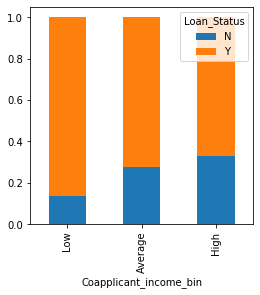

In [67]:
Coapplicant_income_bin = pd.crosstab(train['Coapplicant_income_bin'], train['Loan_Status'])
Coapplicant_income_bin.div(Coapplicant_income_bin.sum(1).astype(float), axis =0).plot(kind='bar', stacked = True, figsize=(4,4))

In [68]:
train['Total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
groups = ['Low', 'Average', 'High', 'Very High']
train['Total_income_bin'] = pd.cut(train['Total_income'], bins, labels=groups)

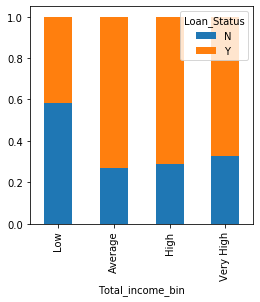

In [69]:
Total_income_bin = pd.crosstab(train['Total_income_bin'], train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1).astype(float), axis =0).plot(kind='bar', stacked = True, figsize=(4,4))

In [70]:
bins = [0, 100, 200, 700]
groups = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=groups)

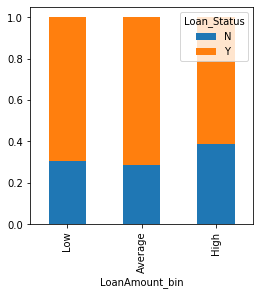

In [71]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis =0).plot(kind='bar', stacked = True, figsize=(4,4))

In [72]:
train

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status Income_bin  \
0               1.0         Urban           Y       High   
1               1.0         Rural           N       High   
2               1.0         Urban           Y    Average   
3               1.0         Urban           Y    Average   
4               1.0         Urban           Y       High   
..              ...           ...         ...        ...   
609             1.0         Rural           Y    Average   
610             1.0         Rural           Y       High   
611             1.0         Urban           Y  Very high   
612             1.0         Urban           Y  Very high   
613             0.0     Semiurban           N       High   

    Coapplicant_income_bin  Total_income Total_income_bin LoanAmount_bin  
0                      NaN        5849.0             High            NaN  
1                  Average        6091.0        Very High        Average  
2                      NaN        3000.0          Average            Low  
3                  Average        4941.0             High        Average  
4                      NaN        6000.0             High        Average  
..                     ...           ...              ...            ...  
609                    NaN        2900.0          Average            Low  
610                    NaN        4106.0             High            Low  
611                    Low        8312.0        Very High           High  
612                    NaN        7583.0        Very High        Average  
613                    NaN        4583.0             High        Average  

[614 rows x 18 columns]

In [73]:
train.drop(['Income_bin', 'Coapplicant_income_bin', 'Total_income', 'Total_income_bin', 'LoanAmount_bin'], axis=1)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [76]:
train['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [75]:
train['Dependents'].replace('3+', 3, inplace=True)

In [79]:
train['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [102]:
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

KeyError: 'Loan_Status'

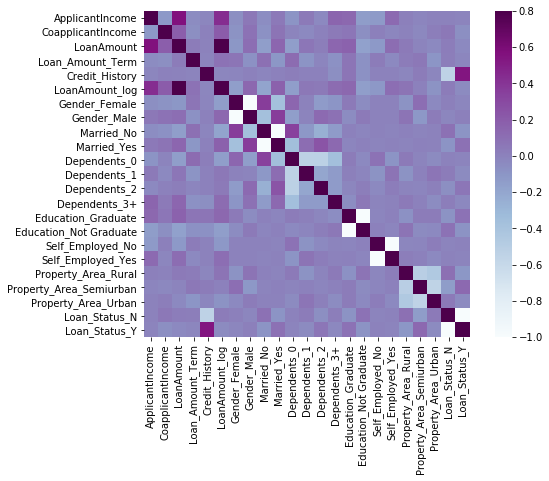

In [103]:
matrix = train.corr()
f, ax = plt.subplots(figsize= (9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

# Missing value and Outlier Treatment

In [12]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [7]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [11]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [45]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [99]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [8]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [44]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [9]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace =True)

In [15]:
train['LoanAmount_log']= np.log(train['LoanAmount'])

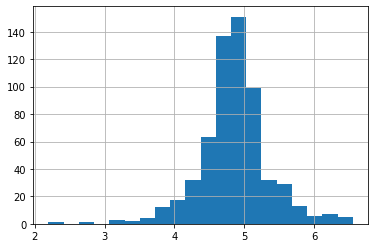

In [16]:
train['LoanAmount_log'].hist(bins=20)

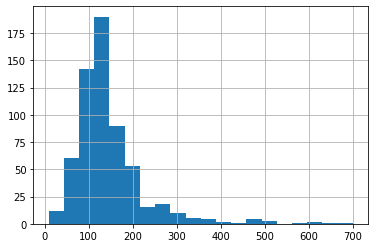

In [18]:
train['LoanAmount'].hist(bins=20)

In [17]:
test['LoanAmount_log']= np.log(test['LoanAmount'])

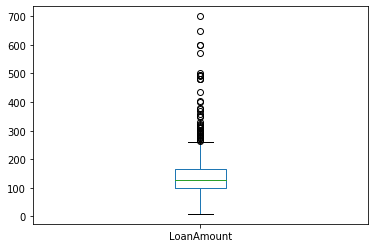

In [19]:
train['LoanAmount'].plot.box()

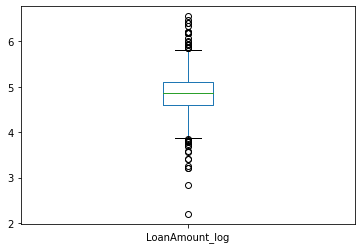

In [20]:
train['LoanAmount_log'].plot.box()

In [22]:
train = train.drop('Loan_ID', axis=1)

In [24]:
test = test.drop('Loan_ID', axis=1)

In [25]:
X = train.drop('Loan_Status', axis=1)

In [26]:
y = train['Loan_Status']

In [28]:
X = pd.get_dummies(X)

In [29]:
train = pd.get_dummies(train)

In [30]:
test = pd.get_dummies(test)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3)

In [33]:
model = LogisticRegression()

In [34]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
pred_cv = model.predict(x_cv)

In [36]:
accuracy_score(y_cv, pred_cv)

0.7945945945945946

In [53]:
pred_test = model.predict(test)

In [63]:
submission = pd.read_csv(r'C:\Users\Hang\Desktop\sample_submission_49d68Cx.csv')

In [64]:
submission['Loan_Status']= pred_test

In [66]:
submission['Loan_ID'] = test_original['Loan_ID']

In [67]:
submission['Loan_Status'].replace(1, 'Y', inplace=True)
submission['Loan_Status'].replace(0, 'N', inplace=True)

In [70]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [72]:
submission

Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]

In [71]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [73]:
from sklearn.model_selection import StratifiedKFold

In [95]:
i=1

In [96]:
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [97]:
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl= y.loc[train_index], y.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


In [86]:
from sklearn import metrics

In [98]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)

In [99]:
auc = metrics.roc_auc_score(yvl, pred)

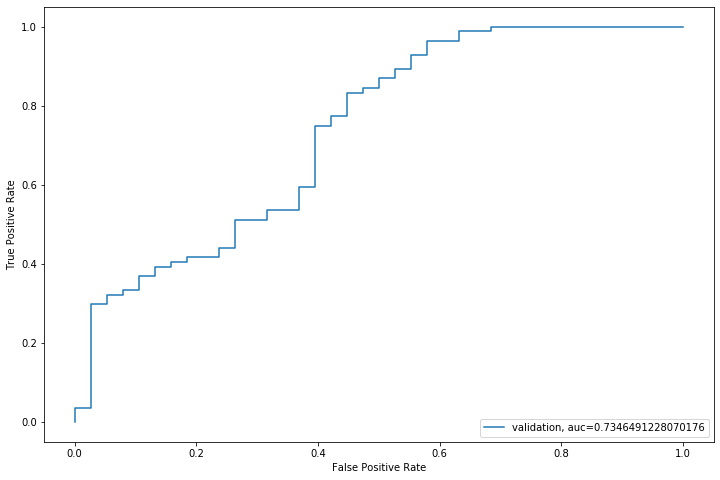

In [101]:
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

# Feature Engineering

In [104]:
train['Total Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

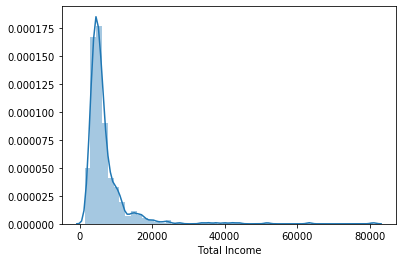

In [105]:
sns.distplot(train['Total Income'])

In [106]:
train['Total_Income_log'] = np.log(train['Total Income'])

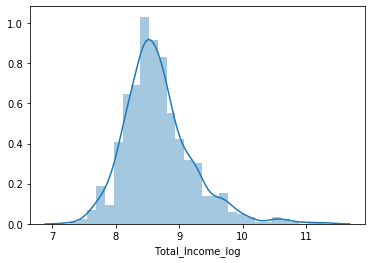

In [107]:
sns.distplot(train['Total_Income_log'])

In [108]:
test['Total_Income_log'] = np.log(test['Total Income'])

In [109]:
train['EMI'] = train['LoanAmount']/ train['Loan_Amount_Term']

In [110]:
test['EMI'] = test['LoanAmount']/ test['Loan_Amount_Term']

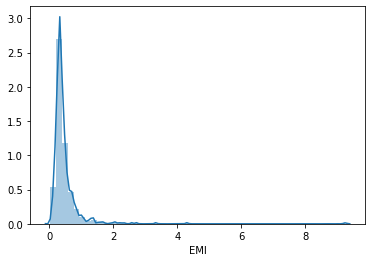

In [111]:
sns.distplot(train['EMI'])

In [112]:
train

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0               1.0        4.852030              0            1           1   
1               1.0        4.852030              0            1           0   
2               1.0        4.189655              0            1           0   
3               1.0        4.787492              0            1           0   
4               1.0        4.948760              0            1           1   
..              ...             ...            ...          ...         ...   
609             1.0        4.262680              1            0           1   
610             1.0        3.688879              0            1           0   
611             1.0        5.533389              0            1           0   
612             1.0        5.231109              0            1           0   
613             0.0        4.890349              1            0           1   

     Married_Yes  ...  Self_Employed_No  Self_Employed_Yes  \
0              0  ...                 1                  0   
1              1  ...                 1                  0   
2              1  ...                 0                  1   
3              1  ...                 1                  0   
4              0  ...                 1                  0   
..           ...  ...               ...                ...   
609            0  ...                 1                  0   
610            1  ...                 1                  0   
611            1  ...                 1                  0   
612            1  ...                 1                  0   
613            0  ...                 0                  1   

     Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                      0                        0                    1   
1                      1                        0                    0   
2                      0                        0                    1   
3                      0                        0                    1   
4                      0                        0                    1   
..                   ...                      ...                  ...   
609                    1                        0                    0   
610                    1                        0                    0   
611                    0                        0                    1   
612                    0                        0                    1   
613                    0                        1                    0   

     Loan_Status_N  Loan_Status_Y  Total Income  Total_Income_log       EMI  
0                0              1        5849.0          8.674026  0.355556  
1                1              0        6091.0          8.714568  0.355556  
2                0              1        3000.0          8.006368  0.183333  
3                0              1        4941.0          8.505323  0.333333  
4                0              1        6000.0          8.699515  0.391667  
..             ...            ...           ...               ...       ...  

In [113]:
train['Balance Income'] = train['Total Income'] - (train['EMI']*1000)
test['Balance Income'] = test['Total Income'] - (test['EMI']*1000)

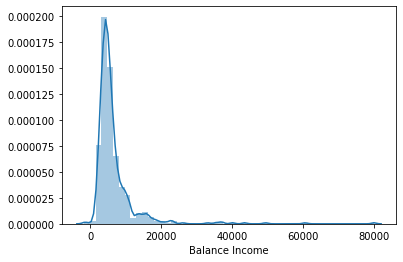

In [114]:
sns.distplot(train['Balance Income'])

In [116]:
matrix = train.corr()

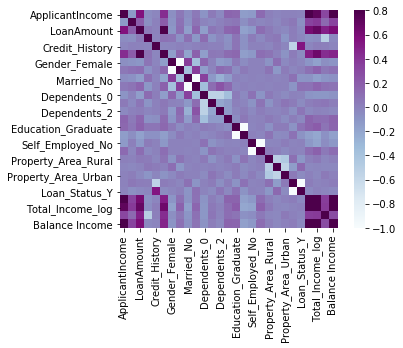

In [120]:
sns.heatmap(matrix,  vmax=.8, square=True, cmap='BuPu')

In [125]:
train = train.drop(['LoanAmount','Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [124]:
test = test.drop(['LoanAmount','Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [158]:
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [159]:
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl= y.loc[train_index], y.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 1.0


ValueError: X has 21 features per sample; expecting 23

In [133]:
X= train.copy()

In [149]:
test

Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0               1.0        4.700480              0            1           0   
1               1.0        4.836282              0            1           0   
2               1.0        5.337538              0            1           0   
3               1.0        4.605170              0            1           0   
4               1.0        4.356709              0            1           1   
..              ...             ...            ...          ...         ...   
362             1.0        4.727388              0            1           0   
363             1.0        4.744932              0            1           0   
364             1.0        4.836282              0            1           1   
365             1.0        5.062595              0            1           0   
366             1.0        4.584967              0            1           1   

     Married_Yes  Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0              1             1             0             0              0   
1              1             0             1             0              0   
2              1             0             0             1              0   
3              1             0             0             1              0   
4              0             1             0             0              0   
..           ...           ...           ...           ...            ...   
362            1             0             0             0              1   
363            1             1             0             0              0   
364            0             1             0             0              0   
365            1             1             0             0              0   
366            0             1             0             0              0   

     ...  Education_Not Graduate  Self_Employed_No  Self_Employed_Yes  \
0    ...                       0                 1                  0   
1    ...                       0                 1                  0   
2    ...                       0                 1                  0   
3    ...                       0                 1                  0   
4    ...                       1                 1                  0   
..   ...                     ...               ...                ...   
362  ...                       1                 0                  1   
363  ...                       0                 1                  0   
364  ...                       0                 1                  0   
365  ...                       0                 1                  0   
366  ...                       0                 0                  1   

     Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                      0                        0                    1   
1                      0                        0                    1   
2                      0                        0                    1   
3                      0                        0                    1   
4                      0                        0                    1   
..                   ...                      ...                  ...   
362                    0                        0                    1   
363                    0                        0                    1   
364                    0                        1                    0   
365                    1                        0                    0   
366                    1                        0                    0   

     Total Income  Total_Income_log       EMI  Balance Income  
0            5720          8.651724  0.305556     5414.444444  
1            4576          8.428581  0.350000     4226.000000  
2            6800          8.824678  0.577778     6222.222222  
3            4886          8.494129  0.277778     4608.222222  
4            3276          8.094378  0.216667

In [150]:
X

Credit_History  LoanAmount_log  Gender_Female  Gender_Male  Married_No  \
0               1.0        4.852030              0            1           1   
1               1.0        4.852030              0            1           0   
2               1.0        4.189655              0            1           0   
3               1.0        4.787492              0            1           0   
4               1.0        4.948760              0            1           1   
..              ...             ...            ...          ...         ...   
609             1.0        4.262680              1            0           1   
610             1.0        3.688879              0            1           0   
611             1.0        5.533389              0            1           0   
612             1.0        5.231109              0            1           0   
613             0.0        4.890349              1            0           1   

     Married_Yes  Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0              0             1             0             0              0   
1              1             0             1             0              0   
2              1             1             0             0              0   
3              1             1             0             0              0   
4              0             1             0             0              0   
..           ...           ...           ...           ...            ...   
609            0             1             0             0              0   
610            1             0             0             0              1   
611            1             0             1             0              0   
612            1             0             0             1              0   
613            0             1             0             0              0   

     ...  Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0    ...                  0                    0                        0   
1    ...                  0                    1                        0   
2    ...                  1                    0                        0   
3    ...                  0                    0                        0   
4    ...                  0                    0                        0   
..   ...                ...                  ...                      ...   
609  ...                  0                    1                        0   
610  ...                  0                    1                        0   
611  ...                  0                    0                        0   
612  ...                  0                    0                        0   
613  ...                  1                    0                        1   

     Property_Area_Urban  Loan_Status_N  Loan_Status_Y  Total Income  \
0                      1              0              1        5849.0   
1                      0              1              0        6091.0   
2                      1              0              1        3000.0   
3                      1              0              1        4941.0   
4                      1              0              1        6000.0   
..                   ...            ...            ...           ...   
609                    0              0              1        2900.0   
610                    0              0              1        4106.0   
611                    1              0              1        8312.0   
612                    1              0              1        7583.0   
613                    0              1              0        4583.0   

     Total_Income_log       EMI  Balance Income  
0            8.674026  0.355556     5493.444444  
1            8.714568  0.355556     5735.444444  
2            8.006368  0.183333     2816.666667  
3            8.505323  0.333333     4607.666667  
4            8.699515  0.391667     5608.333333  
..                ...       ...          

In [154]:
train.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y', 'Total Income', 'Total_Income_log',
       'EMI', 'Balance Income'],
      dtype='object')

In [153]:
test.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')